# 分類器の精度指標

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score
from sklearn.model_selection import train_test_split

from scipy.stats import hmean

In [2]:
# データロード
df = sns.load_dataset('iris')

y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

In [3]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# 予測
y_pred = model.predict(X_test)

## 混合行列

In [6]:
# 「行：正解、列：予測」を意味
cm = confusion_matrix(y_test, y_pred)

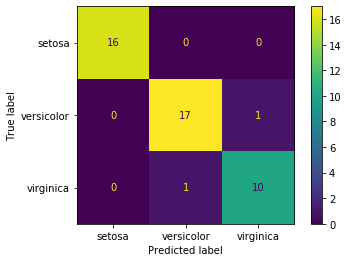

In [7]:
# 混合行列表示
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy（正解率）

In [8]:
y_true_ac = np.array([1,1,0,1,0,0,1,1])
y_pred_ac = np.array([1,1,1,0,0,1,0,1])
accuracy_score(y_true_ac, y_pred_ac)

0.5

## Precision（適合率）

In [9]:
y_true_pr = np.array([1,1,0,1,0,0,1,1])
y_pred_pr = np.array([1,1,1,0,0,1,0,1])
precision_score(y_true_pr, y_pred_pr)

0.6

## Recall（再現率）

In [10]:
y_true_rec = np.array([1,1,0,1,0,0,1,1])
y_pred_rec = np.array([1,1,1,0,0,1,0,1])
recall_score(y_true_rec, y_pred_rec)

0.6

## Specificity（特異度）

In [11]:
y_true_sp = np.array([1,1,0,1,0,0,1,1])
y_pred_sp = np.array([1,1,1,0,0,1,0,1])

In [12]:
recall_score(y_true_sp!=1, y_pred_sp!=1)

0.3333333333333333

## 他クラス評価におけるPrecision

In [13]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
# avearage none
precision_score(y_test,y_pred,average=None)

array([1.        , 0.94444444, 0.90909091])

In [15]:
# avearage macro
precision_score(y_test,y_pred,average='macro')

0.9511784511784511

In [16]:
# avearage micro
precision_score(y_test,y_pred,average='micro')

0.9555555555555556

In [17]:
# average precision micro = accurancy
accuracy_score(y_test,y_pred)

0.9555555555555556

## Precision-Recall Curve

In [18]:
df = pd.read_csv('data/heart_preprocessed.csv')
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0


In [19]:
# 目的変数、説明変数
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

# 予測（確率）
y_pred_proba = model.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [21]:
precision[:10]

array([0.55725191, 0.55555556, 0.55769231, 0.5620155 , 0.56640625,
       0.56862745, 0.57086614, 0.57312253, 0.58      , 0.58232932])

In [22]:
recall[:10]

array([1.        , 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068])

In [23]:
thresholds[:10]

array([0.01468004, 0.01583034, 0.01630261, 0.01630718, 0.01768269,
       0.01855189, 0.01997501, 0.02072147, 0.02115702, 0.02121151])

In [24]:
y_pred_proba[:10]

array([[0.52693376, 0.47306624],
       [0.28438505, 0.71561495],
       [0.99784788, 0.00215212],
       [0.04795848, 0.95204152],
       [0.49057943, 0.50942057],
       [0.99202677, 0.00797323],
       [0.72019563, 0.27980437],
       [0.83804319, 0.16195681],
       [0.30054438, 0.69945562],
       [0.30054438, 0.69945562]])

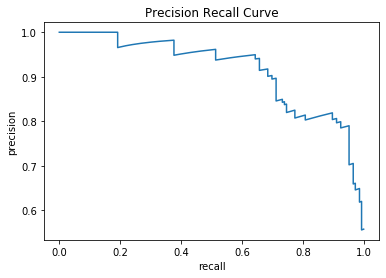

In [25]:
# 回帰直線
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [26]:
model.classes_

array([0, 1])

## F値

In [40]:
y_true_f = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred_f = [1, 1, 1, 0, 0, 1, 0, 1]

f1_score(y_true_f, y_pred_f)

0.4444444444444445

### 調和平均ver

In [41]:
rec = recall_score(y_true_f, y_pred_f)
pre = precision_score(y_true_f, y_pred_f)

# recallとprecisionの調和平均でF値を計算
hmean([rec, pre])

0.4444444444444444